In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Scale Numerical features (Z-scroing)

In [17]:
numeric_df = df.select_dtypes(np.number)
scaled_features = StandardScaler().fit_transform(numeric_df.values)
scaled_df = pd.DataFrame(scaled_features, columns=numeric_df.columns)

## Create dummy variables for categorical features

In [19]:
cat_df = df.select_dtypes(exclude=np.number)
dummy_df = pd.get_dummies(cat_df, drop_first=True)  # Drop first dummy variable as a base

In [36]:
features = pd.concat([scaled_df, dummy_df], axis=1)
features["HeartDisease"] = df["HeartDisease"]  # Undo standard scaling for target variable

In [37]:
features.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,-1.083616e-16,1.954380e-16,0.000000,-3.096047e-17,4.953675e-16,1.238419e-16,0.553377,0.789760,0.188453,0.221133,0.050109,0.601307,0.193900,0.404139,0.501089,0.430283
std,1.000545e+00,1.000545e+00,1.000545,1.000545e+00,1.000545e+00,1.000545e+00,0.497414,0.407701,0.391287,0.415236,0.218289,0.489896,0.395567,0.490992,0.500271,0.495386
min,-2.706015e+00,-7.154995e+00,-1.818435,-5.513413e-01,-3.018469e+00,-3.271482e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.906294e-01,-6.699346e-01,-0.233704,-5.513413e-01,-6.605778e-01,-8.324324e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.188098e-02,-1.295128e-01,0.221363,-5.513413e-01,4.678968e-02,-2.695748e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.883185e-01,4.109089e-01,0.623835,-5.513413e-01,7.541571e-01,5.747115e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2.491558e+00,3.653439e+00,3.697252,1.813758e+00,2.561874e+00,4.983762e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# KNN

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

/Users/anko/.pyenv/versions/3.9.9/envs/venv39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

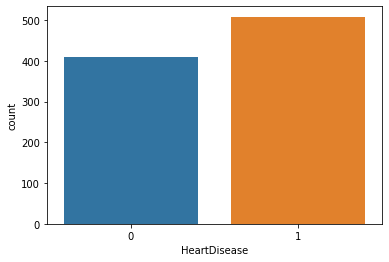

In [38]:
sns.countplot(features["HeartDisease"])